### FastAI Models w ImageNet weight initialisation
<a id="fastai"></a>

In [2]:
# pytorch and fastai
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', -1)

---

In [3]:
def freememory():
    """
    Run garbage collection to free up memory.
    """
    import gc
    gc.collect()

def freegpu(data, model):
    del data
    del model
    freememory()
    torch.cuda.empty_cache()
    freememory()

In [4]:
def train_stage1(data_dir, arch=models.resnet34, cycles=10, bs=32):
    data = (ImageList.from_folder(data_dir + '/')
            .split_by_folder(train='train', valid='valid')
            .label_from_folder()
            .transform(size=512)
            .databunch(bs=bs)
            .normalize(imagenet_stats)
           )    
    ## To create a ResNET 34 with pretrained weights
    learn = cnn_learner(data, arch, metrics=[accuracy], callback_fns=ShowGraph)
    learn.lr_find(stop_div=False, num_it=1000, end_lr=0.1)
    learn.recorder.plot(suggestion=True)
    min_grad_lr = learn.recorder.min_grad_lr 
    min_grad_lr = min_grad_lr if min_grad_lr > 1e-4 else 1e-4
    print("Minimum gradient learning rate: {}".format(min_grad_lr))
    learn.fit_one_cycle(cycles, min_grad_lr)
    learn.save('stage-1')
    
    preds,y = learn.get_preds()
    top1 = accuracy(preds,y)
    top5 = top_k_accuracy(preds,y,5)
    print('stage1 acc: {}, top5: {}'.format(top1,top5))
    
    # Free up gpu and memory
    freegpu(data, learn)
    return top1,top5

def train_data(data_dirs, archs=[models.resnet34], cycles=1):         
    results = {'model':[],'dataset':[],'top1':[],'top5':[]}
    # iterate architectures
    for name, arch in archs:     
        # iterate models
        for data_dir in data_dirs:
            dim_ = int(''.join([x for x in data_dir if x.isdigit()][1:]))
            batch_size = int(2**13 / dim_)
            print("dir: {} bs:{}".format(data_dir, batch_size))
            top1,top5 = train_stage1(data_dir, arch, cycles, bs=batch_size)
            
            results['model'].append(name)
            results['dataset'].append(data_dir.split)
            results['top1'].append(top1.item())
            results['top5'].append(top5.item())
    return pd.DataFrame(results)

#### Recreate best result

#### Intogen gene list

In [11]:
best_exp = '../data/gene_images/2d_clustering/intogen/dim=128_alg=MiniBatchKMeans_norm=non-zero_col=viridis'
data = (ImageList.from_folder(best_exp + '/')
        .split_by_folder(train='train', valid='valid')          
        .label_from_folder()
        .databunch(bs=64)
        .normalize(imagenet_stats)
       )
arch = models.resnet34
learn = cnn_learner(data, arch, metrics=[accuracy], callback_fns=ShowGraph)
learn.fit_one_cycle(10, 0.01)
preds,y = learn.get_preds()
top1 = accuracy(preds,y)
top5 = top_k_accuracy(preds,y,5)
print('stage1 acc: {}, top5: {}'.format(top1,top5))

# Free up gpu and memory
freegpu(data, learn)

stage1 acc: 0.4591194987297058, top5: 0.7788259983062744


epoch,train_loss,valid_loss,accuracy,time
0,1.526927,1.859788,0.462264,00:18
1,1.647419,2.002905,0.427673,00:18
2,1.747716,2.177155,0.380503,00:18
3,1.744451,2.051647,0.400419,00:18
4,1.706223,2.036851,0.407757,00:19
5,1.606938,2.012452,0.426625,00:18
6,1.506195,1.958215,0.440252,00:18
7,1.359391,1.935485,0.460168,00:18
8,1.268445,1.940658,0.460168,00:18
9,1.185636,1.940847,0.463312,00:18


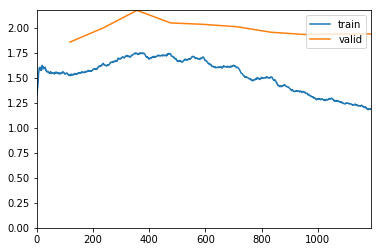

In [12]:
learn.fit_one_cycle(10, 0.005)

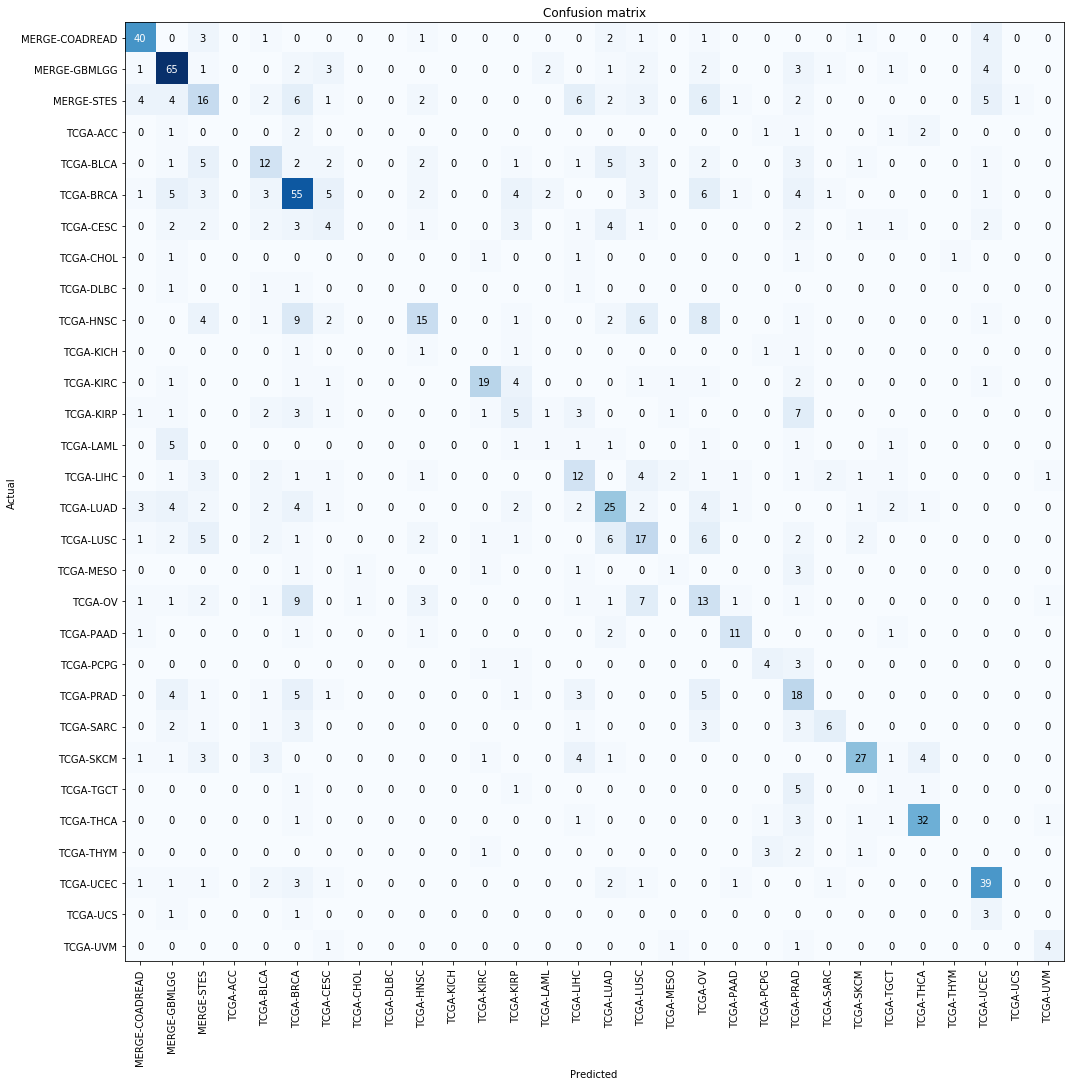

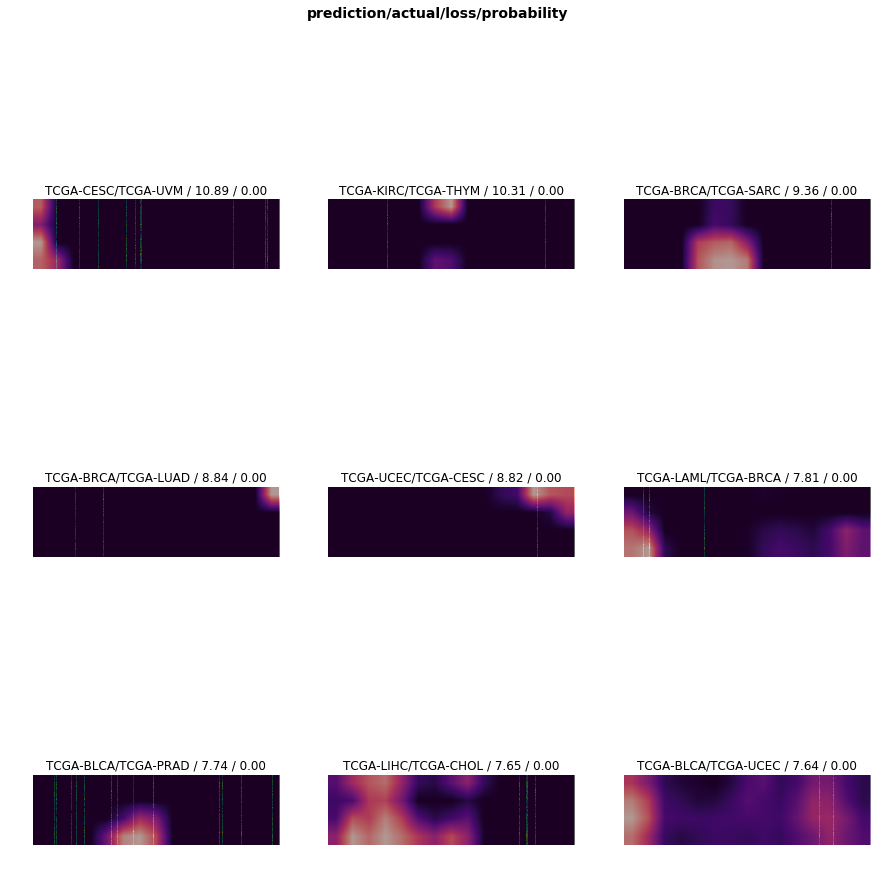

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(15,15))
interp.plot_top_losses(9, figsize=(15,15))

#### Mutsigcv Genes

In [6]:
best_exp = '../data/gene_images/2d_clustering/mutsigcv/dim=256_alg=MiniBatchKMeans_norm=non-zero_col=viridis'
data = (ImageList.from_folder(best_exp + '/')
        .split_by_folder(train='train', valid='valid')          
        .label_from_folder()
        .databunch(bs=64)
        .normalize(imagenet_stats)
       )
arch = models.resnet34
learn = cnn_learner(data, arch, metrics=[accuracy], callback_fns=ShowGraph)
learn.fit_one_cycle(10, 0.01)
preds,y = learn.get_preds()
top1 = accuracy(preds,y)
top5 = top_k_accuracy(preds,y,5)
print('stage1 acc: {}, top5: {}'.format(top1,top5))

# Free up gpu and memory
# freegpu(data, learn)

stage1 acc: 0.4313524663448334, top5: 0.7551229596138


epoch,train_loss,valid_loss,accuracy,time
0,1.685274,1.989138,0.432377,01:31
1,1.757589,2.060800,0.400615,01:30
2,1.842810,2.303212,0.351434,01:31
3,1.812033,2.139058,0.404713,01:32
4,1.776704,2.059392,0.405738,01:31
5,1.717974,2.049467,0.417008,01:31
6,1.598204,2.001759,0.440574,01:32
7,1.485713,1.979262,0.438525,01:31
8,1.409052,2.010306,0.429303,01:32
9,1.362803,2.001750,0.432377,01:31


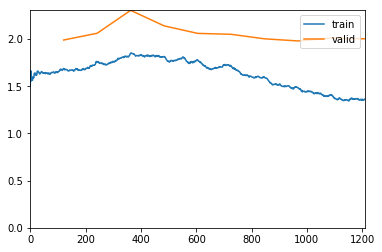

In [7]:
learn.fit_one_cycle(10, 0.005)

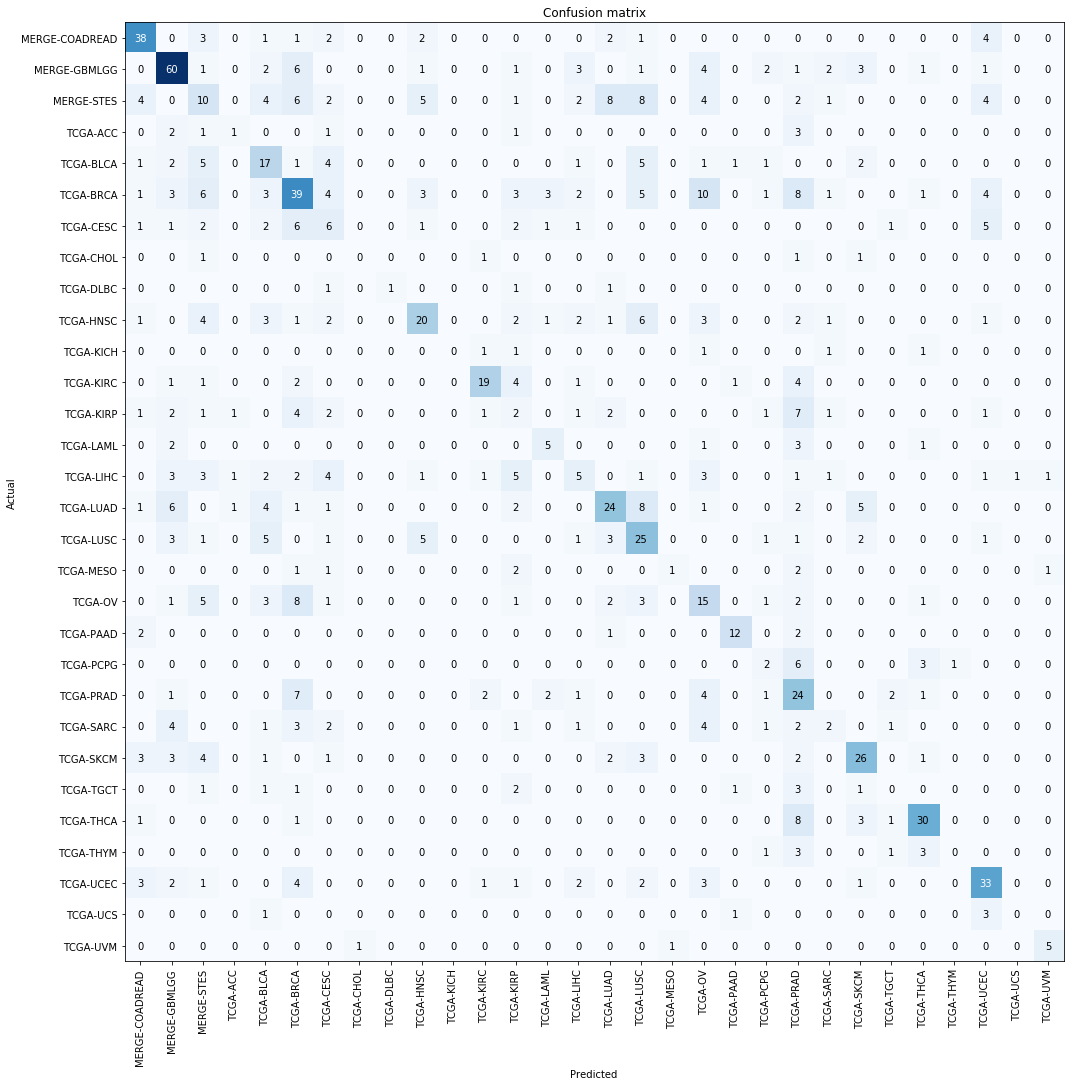

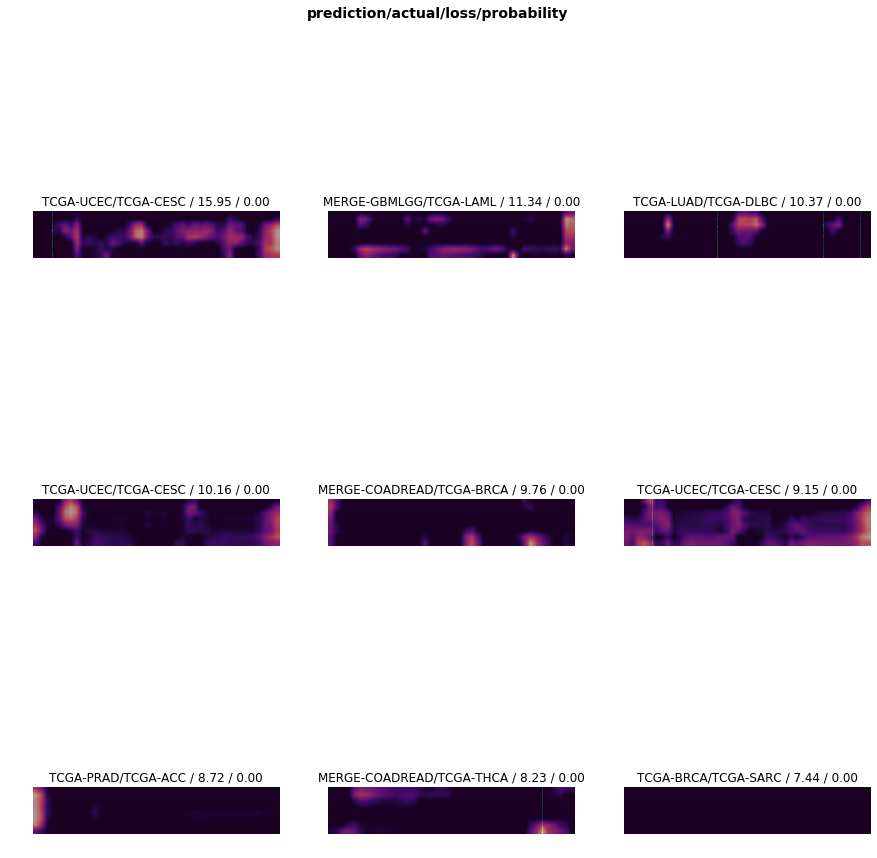

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(15,15))
interp.plot_top_losses(9, figsize=(15,15))

#### Mutsigcv genes with thickening

In [14]:
best_exp = '../data/gene_images/2d_clustering/mutsigcv_thickened/dim=256_alg=MiniBatchKMeans_norm=non-zero_col=viridis'
data = (ImageList.from_folder(best_exp + '/')
        .split_by_folder(train='train', valid='valid')          
        .label_from_folder()
        .databunch(bs=64)
        .normalize(imagenet_stats)
       )
arch = models.resnet34
learn = cnn_learner(data, arch, metrics=[accuracy], callback_fns=ShowGraph)
learn.fit_one_cycle(10, 0.01)
preds,y = learn.get_preds()
top1 = accuracy(preds,y)
top5 = top_k_accuracy(preds,y,5)
print('stage1 acc: {}, top5: {}'.format(top1,top5))

# Free up gpu and memory
freegpu(data, learn)

stage1 acc: 0.4436475336551666, top5: 0.7674180269241333


epoch,train_loss,valid_loss,accuracy,time
0,1.493824,2.021452,0.435451,01:32
1,1.583484,2.103321,0.411885,01:33
2,1.715857,2.201807,0.376025,01:32
3,1.702446,2.139156,0.403689,01:33
4,1.686937,2.133307,0.395492,01:32
5,1.568203,2.055791,0.417008,01:32
6,1.457627,2.068507,0.430328,01:33
7,1.275269,2.118393,0.443648,01:33
8,1.138147,2.113071,0.451844,01:33
9,1.078204,2.121948,0.448770,01:33


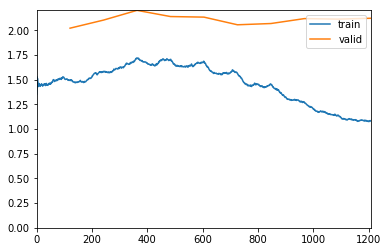

In [15]:
learn.fit_one_cycle(10, 0.005)

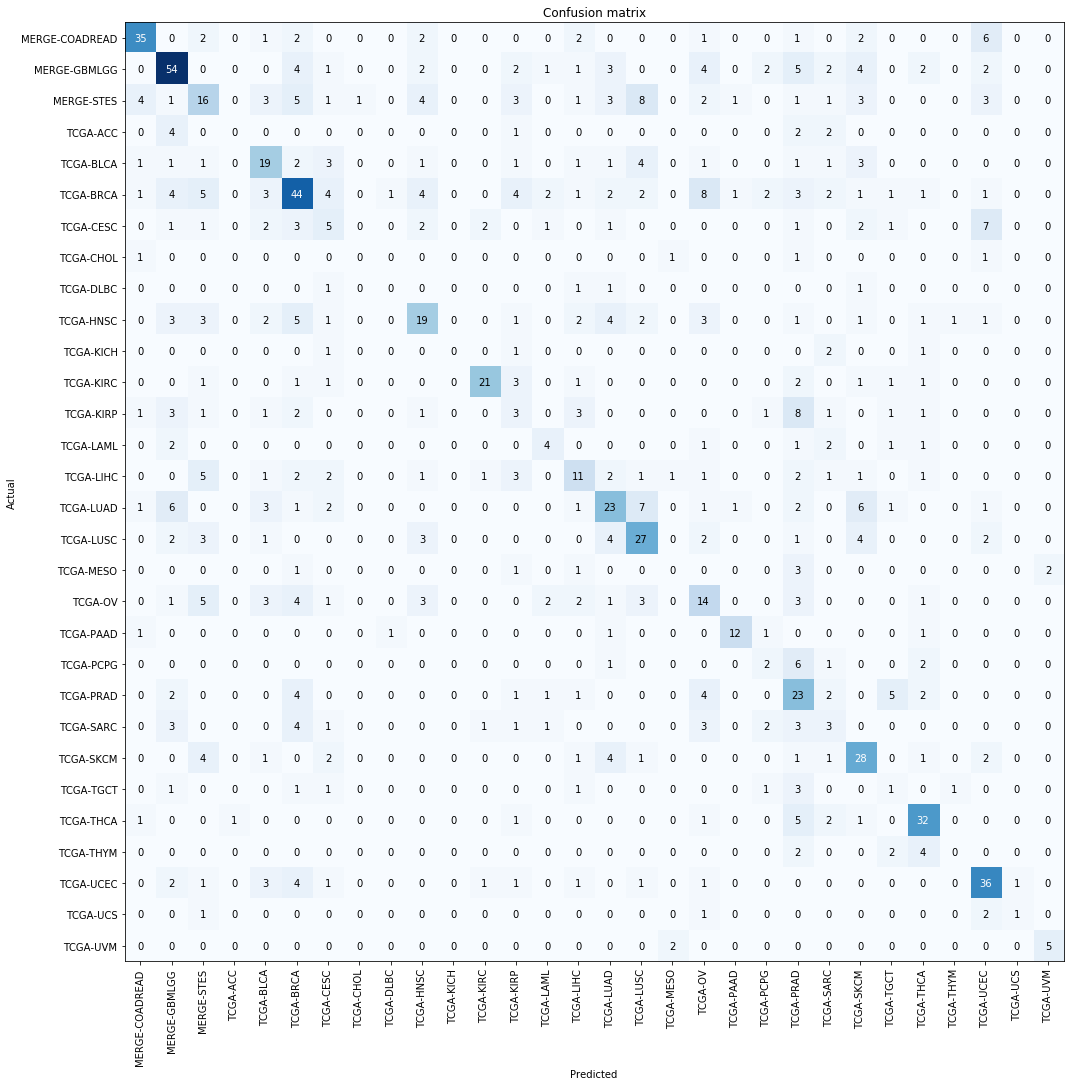

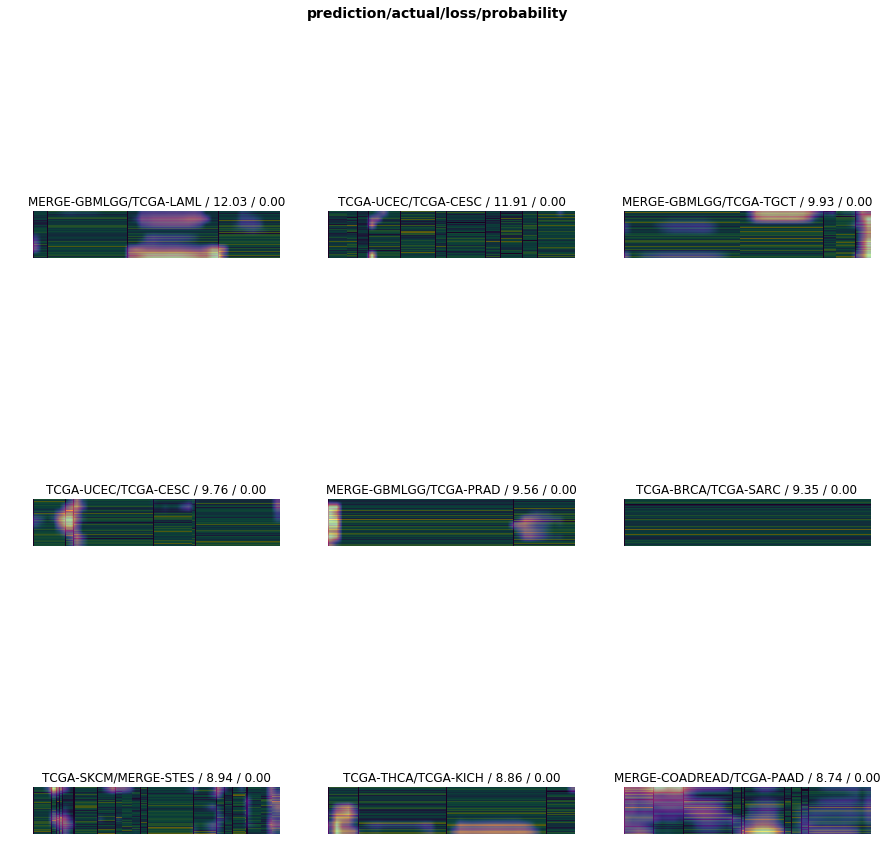

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(15,15))
interp.plot_top_losses(9, figsize=(15,15))

#### Mutsigcv genes, 512*512 reshape

In [17]:
best_exp = '../data/gene_images/2d_clustering/mutsigcv/dim=256_alg=MiniBatchKMeans_norm=non-zero_col=viridis'
data = (ImageList.from_folder(best_exp + '/')
        .split_by_folder(train='train', valid='valid')          
        .label_from_folder()
        .transform(size=512)
        .databunch(bs=64)
        .normalize(imagenet_stats)
       )
arch = models.resnet34
learn = cnn_learner(data, arch, metrics=[accuracy], callback_fns=ShowGraph)
learn.fit_one_cycle(10, 0.01)
preds,y = learn.get_preds()
top1 = accuracy(preds,y)
top5 = top_k_accuracy(preds,y,5)
print('stage1 acc: {}, top5: {}'.format(top1,top5))

# Free up gpu and memory
freegpu(data, learn)

stage1 acc: 0.18954917788505554, top5: 0.5348360538482666


epoch,train_loss,valid_loss,accuracy,time
0,2.620652,2.761640,0.187500,01:20
1,2.664342,2.819633,0.164959,01:20
2,2.703733,2.784629,0.161885,01:19
3,2.704363,2.784020,0.180328,01:19
4,2.696449,2.773565,0.183402,01:19
5,2.651087,2.781751,0.182377,01:19
6,2.630331,2.777650,0.183402,01:19
7,2.583575,2.790336,0.179303,01:19
8,2.521025,2.786839,0.179303,01:19
9,2.486242,2.785392,0.182377,01:20


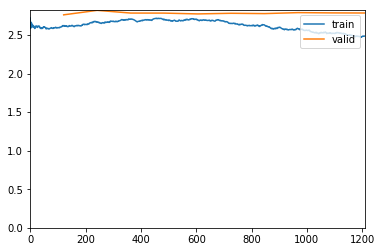

In [18]:
learn.fit_one_cycle(10, 0.005)

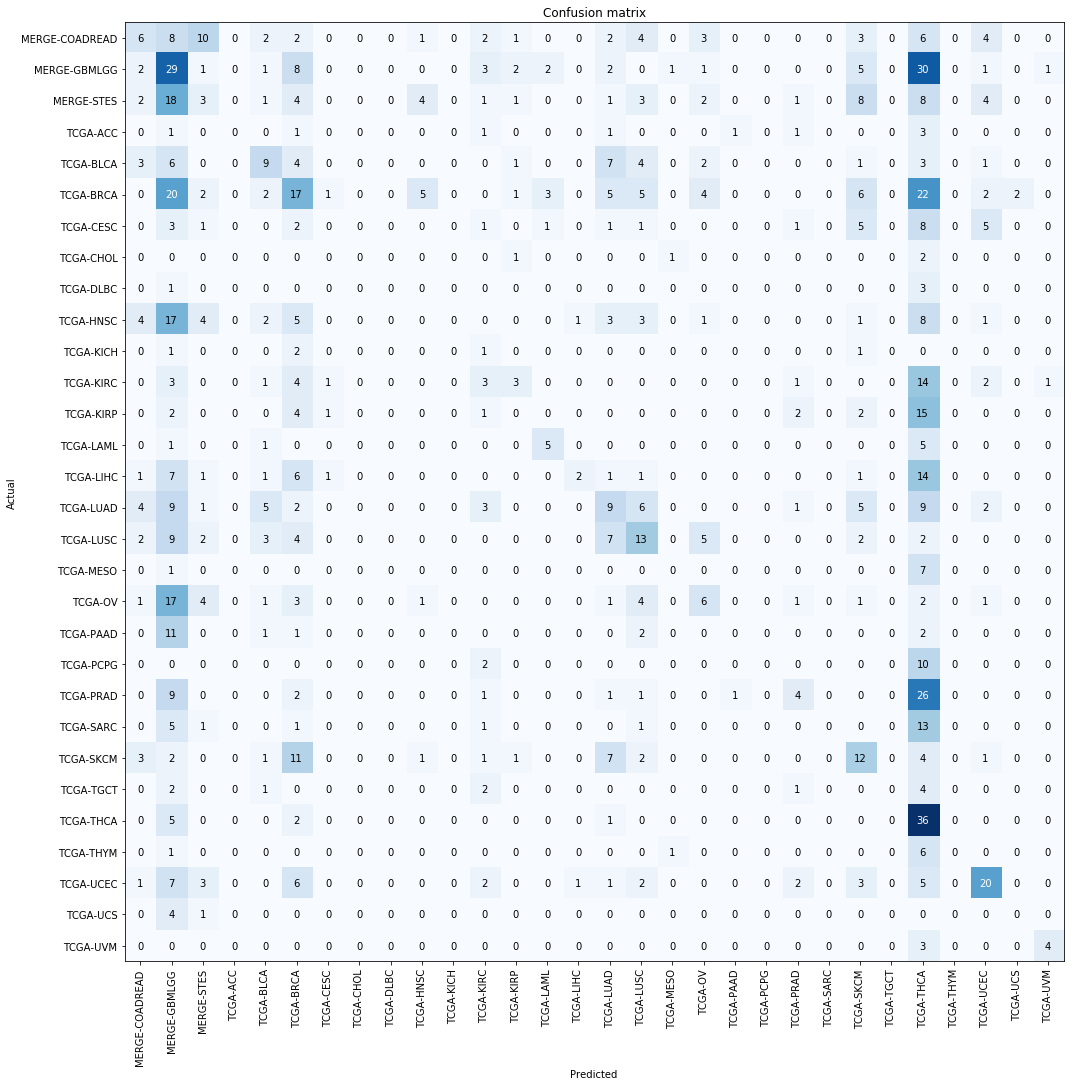

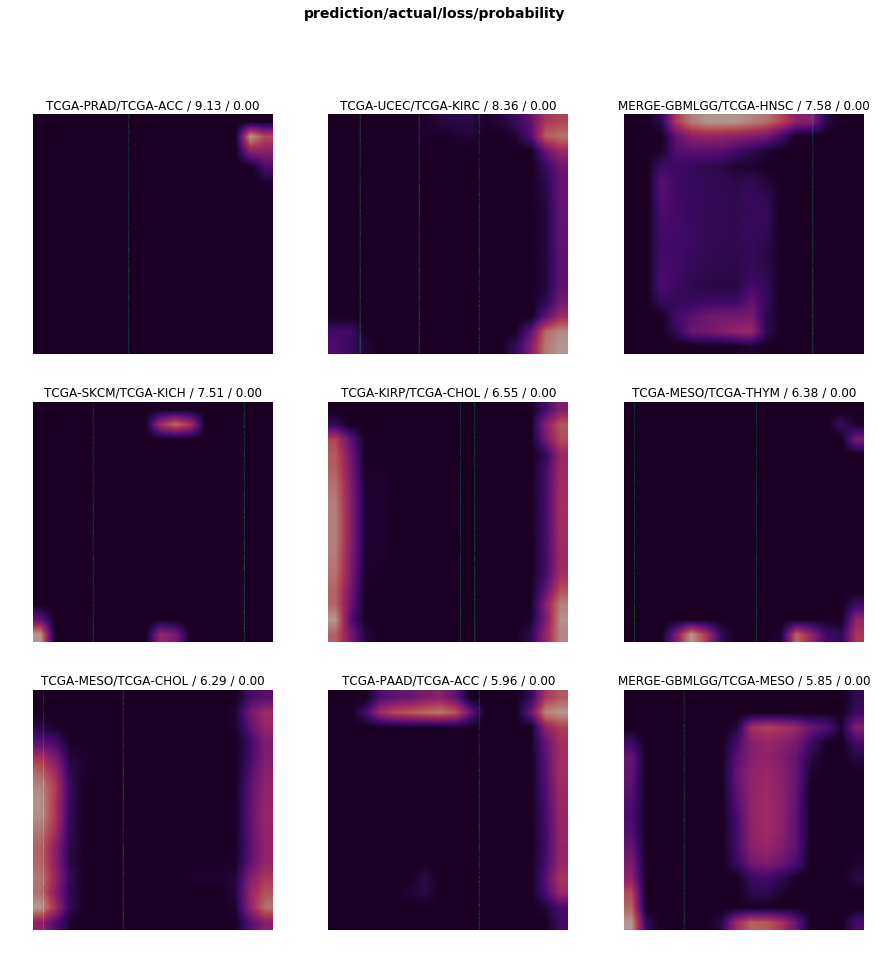

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(15,15))
interp.plot_top_losses(9, figsize=(15,15))

#### Mutsigcv genes, 512*512 reshape, thickened

In [29]:
best_exp = '../data/gene_images/2d_clustering/mutsigcv_thickened/dim=256_alg=MiniBatchKMeans_norm=non-zero_col=viridis'
data = (ImageList.from_folder(best_exp + '/')
        .split_by_folder(train='train', valid='valid')          
        .label_from_folder()
        .transform(size=512)
        .databunch(bs=64)
        .normalize(imagenet_stats)
       )
arch = models.resnet34
learn = cnn_learner(data, arch, metrics=[accuracy], callback_fns=ShowGraph)
learn.fit_one_cycle(10, 0.01)
preds,y = learn.get_preds()
top1 = accuracy(preds,y)
top5 = top_k_accuracy(preds,y,5)
print('stage1 acc: {}, top5: {}'.format(top1,top5))

# Free up gpu and memory
freegpu(data, learn)

stage1 acc: 0.24795082211494446, top5: 0.5809426307678223


epoch,train_loss,valid_loss,accuracy,time
0,2.236653,2.585778,0.247951,01:21
1,2.348393,2.636479,0.235656,01:21


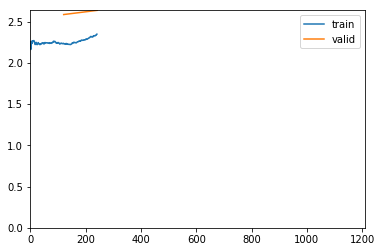

In [ ]:
learn.fit_one_cycle(10, 0.005)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(15,15))
interp.plot_top_losses(9, figsize=(15,15))

---

#### Experiment 3: Honing in on best data results

In [ ]:
# take best experiment on resnet34 and see how well we can fine tune
best_exp = '../data/genevec_images/1d_clustering/dim=128_alg=GaussianMixture_norm=non-zero_col=seismic'
data = (ImageList.from_folder(best_exp + '/')
        .split_by_folder(train='train', valid='valid')          
        .label_from_folder()
        .databunch(bs=64)
        .normalize(imagenet_stats)
       )    
data.show_batch(rows=4, figsize=(30,30))
arch = models.resnet34

# Get first pass learning rate
learn = cnn_learner(data, arch, metrics=[accuracy], callback_fns=ShowGraph)
learn.lr_find(stop_div=False, num_it=100, start_lr=1e-5, end_lr=0.1)
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr
print("Minimum gradient learning rate: {}".format(min_grad_lr))

In [ ]:
# Free up gpu and memory
freegpu(data, learn)

# Train 20 cycles and check validation vs training set performance.
learn.fit_one_cycle(20, min_grad_lr)
learn.show_results()
learn.save('stage-1')

In [ ]:
# Take another look at learning rate
learn.lr_find(stop_div=False, num_it=100, start_lr=1e-7, end_lr=0.1)
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr
print("Minimum gradient learning rate: {}".format(min_grad_lr))

In [ ]:
# Unlock layers and go again. 5 iterations this time.
learn.unfreeze()
learn.fit_one_cycle(5, min_grad_lr)
learn.show_results()
learn.save('stage-1')

In [ ]:
# Once more with a higher learning rate.
learn.fit_one_cycle(5, min_grad_lr*100)
learn.show_results()
learn.save('stage-1')